# ACML Project

## Predicting Life Expectancy considering immunization and human development index

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import seaborn as sns 

sns.set_style("darkgrid")

## Data Description 


The data was downloaded from (https://www.kaggle.com/kumarajarshi/life-expectancy-who) on 13 April 2021. This is data from the World Health Organisation taken between 2000 and 2015. It describes the life expectancy along with the immunization factors, mortality factors, economic factors, social factors and other health related factors for 193 countries. ####

## Variable Description


#### Life expectancy
Life Expectancy in age 

#### Adult Mortality
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

#### Status
Developed or Developing status

#### Infant deaths
Number of Infant Deaths per 1000 population

#### Alcohol
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

#### percentage expenditure
Expenditure on health as a percentage of Gross Domestic Product per capita(%)

#### Hepatitis B
Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

#### Measles
Measles - number of reported cases per 1000 population


## Load Data

In [2]:
dataset = pd.read_csv('Life Expectancy Data.csv', sep=",")

In [3]:
dataset.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

     ...      Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0    ...        6.0               8.16         65.0        0.1  584.259210   
1    ...       58.0               8.18         62.0        0.1  612.696514   
2    ...       62.0               8.13         64.0        0.1  631.744976   
3    ...       67.0               8.52         67.0        0.1  669.959000   
4    ...       68.0               7.87         68.0        0.1   63.537231   

   Population   thinness  1-19 years   thinness 5-9 years  \
0  33736494.0                   17.2                 17.3   
1    327582.0                   17.5                 17.5   
2  31731688.0                   17.7                 17.7   
3   3696958.0                   17.9                 18.0   
4   2978599.0                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
dataset.Alcohol.value_counts() 

0.01     288
0.03      15
0.04      13
0.09      12
0.02      12
0.21      10
0.06      10
1.18      10
0.54       9
0.56       9
0.55       9
0.08       9
0.49       9
0.05       9
1.29       8
0.53       8
0.50       8
0.17       8
0.28       7
1.16       7
0.10       7
0.20       7
7.38       7
0.46       7
2.86       7
2.55       6
0.85       6
0.45       6
0.32       6
1.23       6
        ... 
8.16       1
10.11      1
11.51      1
7.72       1
12.61      1
13.40      1
11.19      1
11.14      1
5.46       1
11.54      1
9.80       1
2.81       1
10.06      1
2.21       1
12.14      1
13.44      1
1.05       1
13.49      1
1.88       1
9.08       1
7.76       1
2.43       1
11.58      1
10.31      1
5.18       1
8.98       1
5.86       1
9.03       1
6.87       1
13.28      1
Name: Alcohol, Length: 1076, dtype: int64

In [7]:
#replace null alcohol with most occuring 
dataset.Alcohol.fillna(0.01,inplace=True)

In [8]:
#replace GDP null values with the median
gdp_median =dataset.GDP.median()
dataset.GDP.fillna(gdp_median,inplace=True)

In [9]:
#the rest drop the null values
dataset.dropna(inplace=True)

In [11]:
#correlation values
dataset.corr()

Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.049783        -0.037968   
Life expectancy                  0.049783          1.000000        -0.701085   
Adult Mortality                 -0.037968         -0.701085         1.000000   
infant deaths                    0.007336         -0.168918         0.042675   
Alcohol                         -0.115505          0.401946        -0.173753   
percentage expenditure           0.068363          0.409311        -0.236800   
Hepatitis B                      0.112543          0.200912        -0.104831   
Measles                         -0.054148         -0.068813        -0.003727   
 BMI                             0.007884          0.539432        -0.350715   
under-five deaths                0.009772         -0.192087         0.060567   
Polio                           -0.022700          0.326294        -0.195481   
Total expenditure                0.055879          0.174391        -0.083500   
Diphtheria                       0.023256          0.337400        -0.186440   
 HIV/AIDS                       -0.123901         -0.591609         0.550282   
GDP                              0.095342          0.441001        -0.254303   
Population                       0.011806         -0.022272        -0.014721   
 thinness  1-19 years            0.020647         -0.457460         0.271450   
 thinness 5-9 years              0.014885         -0.457154         0.286013   
Income composition of resources  0.122543          0.720750        -0.442009   
Schooling                        0.088388          0.726849        -0.421468   

                                 infant deaths   Alcohol  \
Year                                  0.007336 -0.115505   
Life expectancy                      -0.168918  0.401946   
Adult Mortality                       0.042675 -0.173753   
infant deaths                         1.000000 -0.105025   
Alcohol                              -0.105025  1.000000   
percentage expenditure               -0.090364  0.417787   
Hepatitis B                          -0.231046  0.111907   
Measles                               0.532757 -0.048984   
 BMI                                 -0.234319  0.349281   
under-five deaths                     0.996906 -0.099855   
Polio                                -0.154273  0.244289   
Total expenditure                    -0.145481  0.219070   
Diphtheria                           -0.158383  0.248163   
 HIV/AIDS                             0.007990 -0.025496   
GDP                                  -0.097759  0.443820   
Population                            0.671803 -0.028121   
 thinness  1-19 years                 0.462976 -0.404110   
 thinness 5-9 years                   0.461563 -0.386327   
Income composition of resources      -0.134754  0.559614   
Schooling                            -0.214038  0.616334   

                                 percentage expenditure  Hepatitis B  \
Year                                           0.068363     0.112543   
Life expectancy                                0.409311     0.200912   
Adult Mortality                               -0.236800    -0.104831   
infant deaths                                 -0.090364    -0.231046   
Alcohol                                        0.417787     0.111907   
percentage expenditure                         1.000000     0.017599   
Hepatitis B                                    0.017599     1.000000   
Measles                                       -0.062651    -0.124198   
 BMI                                           0.241237     0.140768   
under-five deaths                             -0.091737    -0.240005   
Polio                                          0.129966     0.463044   
Total expenditure                              0.185353     0.115247   
Diphtheria                                     0.136626     0.584697   
 HIV/AIDS                                     -0.094427    -0.093970   
GDP            

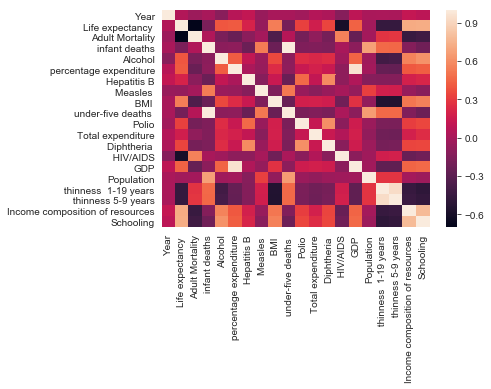

In [15]:
sns.heatmap(dataset.corr())

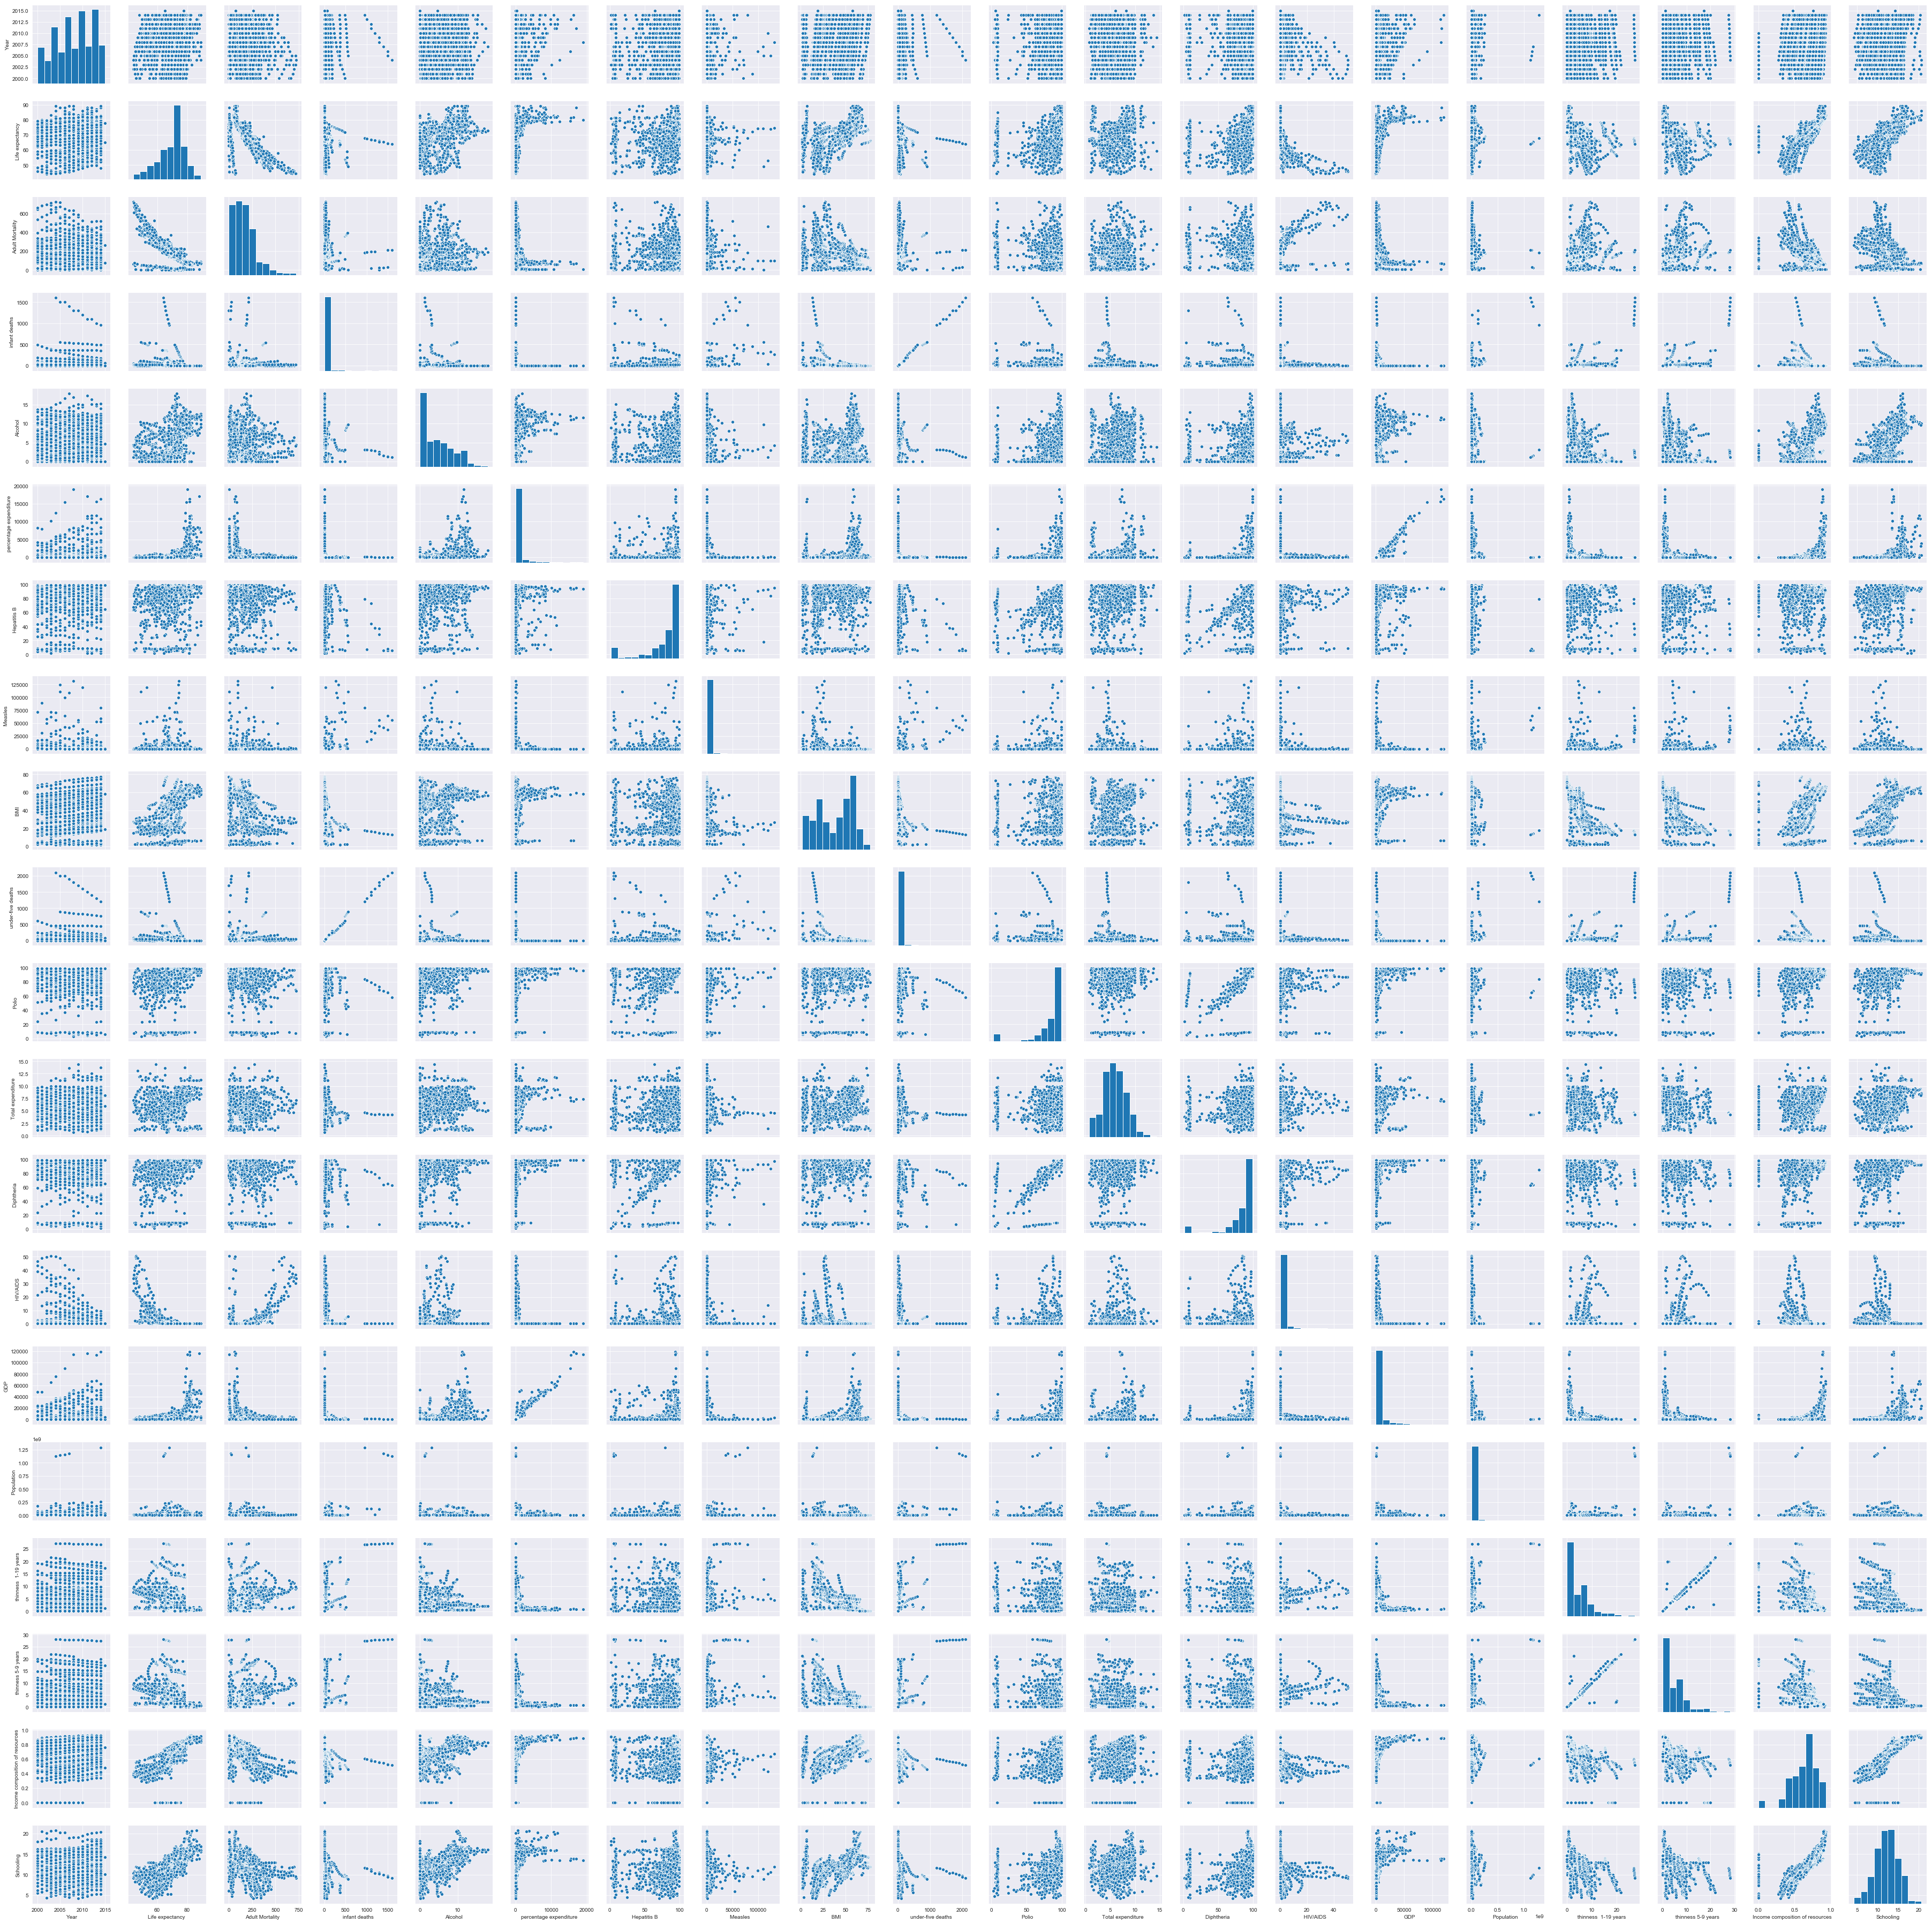

In [16]:
sns.pairplot(dataset)